(12089, 785)
(12089,)


D:\TDT4265\Anaconda\envs\tdt4265\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log


i:  933
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.87410663e-08 -4.04807031e-07 -4.04807031e-07 -1.68669596e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.88550971e-08
 -1.40428139e-06 -1.74193512e-06 -2.56636520e-06 -2.65988042e-06
 -1.75706177e-06 -1.27627619e-06 -3.50567442e-06 -1.61875570e-05
 -3.84677259e-05 -5.40520301e-06 -2.64962886e-07  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 

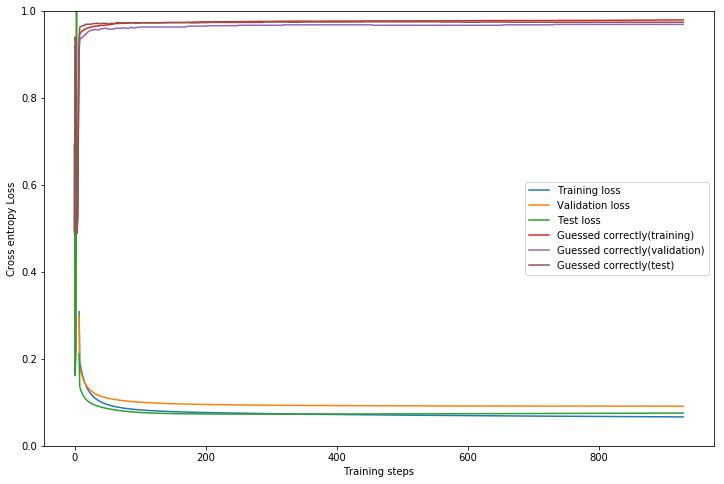

In [39]:
import mnist
import numpy as np
import matplotlib.pyplot as plt # Plotting library

#mnist.init()
X_train, Y_train, X_test, Y_test = mnist.load()

#using only images decipting a 2 or 3
X_train = X_train[(Y_train == 3) | (Y_train == 2)]
Y_train = Y_train[(Y_train == 3) | (Y_train == 2)]
Y_train = (Y_train == 2).astype(int)
ones = np.ones((X_train.shape[0],1))
X_train = np.concatenate((X_train,ones), axis = 1)
print(X_train.shape)

X_test = X_test[(Y_test == 3) | (Y_test == 2)]
Y_test = Y_test[(Y_test == 3) | (Y_test == 2)]
Y_test = (Y_test == 2).astype(int)

NUMBER_IN_TRAINING_SET = 10000;
NUMBER_IN_TEST_SET =2000;
NUMBER_IN_VALIDATION_SET = 1000;

print(Y_train.shape)
#Test sets
X_test_set = X_train[NUMBER_IN_TRAINING_SET:NUMBER_IN_TRAINING_SET + NUMBER_IN_TEST_SET];
Y_test_set = Y_train[NUMBER_IN_TRAINING_SET:NUMBER_IN_TRAINING_SET + NUMBER_IN_TEST_SET];

#for debugging purposes
X_train = X_train[0:NUMBER_IN_TRAINING_SET];
Y_train = Y_train[0:NUMBER_IN_TRAINING_SET];



#Split into validation and training set
X_validation = X_train[NUMBER_IN_TRAINING_SET - NUMBER_IN_VALIDATION_SET: NUMBER_IN_TRAINING_SET];
Y_validation = Y_train[NUMBER_IN_TRAINING_SET - NUMBER_IN_VALIDATION_SET: NUMBER_IN_TRAINING_SET];

X_train = X_train[0:NUMBER_IN_TRAINING_SET - NUMBER_IN_VALIDATION_SET];
Y_train = Y_train[0:NUMBER_IN_TRAINING_SET - NUMBER_IN_VALIDATION_SET];






#implementing gradient descent
weights = np.zeros(X_train[0].size)

m = 1000
learning_rate = 0.000001

def cross_entropy_loss_function(target, output_probability):
    N=target.size
    return -(np.dot(target,np.log(output_probability))+np.dot((1-target),np.log(1-output_probability)))/N

def values_guessed_correctly_percentage(probabilities_of_values, actual_values):
    VALUES_GUESSED=np.zeros(probabilities_of_values.size)
    correctly_guessed_numbers=0;
    for i in range(probabilities_of_values.size):
        if probabilities_of_values[i]<0.5:
            VALUES_GUESSED[i]=0
        else:
            VALUES_GUESSED[i]=1
        if VALUES_GUESSED[i]==actual_values[i]:
            correctly_guessed_numbers+=1
    return (correctly_guessed_numbers/(probabilities_of_values.size))

TRAIN_LOSS = np.zeros(m)
TEST_LOSS = np.zeros(m)
VALIDATION_LOSS = np.zeros(m)

TRAIN_PERCENTAGE_CORRECTLY = np.zeros(m)
VALIDATION_PERCENTAGE_CORRECTLY = np.zeros(m)
TEST_PERCENTAGE_CORRECTLY = np.zeros(m)

WEIGHTS=[[],[],[]]
STEP = np.zeros(m)

#for early stopping
cost_increase_in_a_row = 0;
iteration_should_stop = 0;
end_weights = np.zeros(X_train[0].size)


lamda = 0
#Training routine
for i in range(0,m):
    
    
    
    probability = 1 / (1 + np.exp(np.dot(X_train,weights))) #mulig pluss/minus-feil
    validation_set_probability = 1 / (1 + np.exp(np.dot(X_validation,weights)))
    test_set_probability = 1 / (1 + np.exp(np.dot(X_test_set,weights)))
    
    TRAIN_LOSS[i]=cross_entropy_loss_function(Y_train,probability)
    VALIDATION_LOSS[i]=cross_entropy_loss_function(Y_validation,validation_set_probability)
    TEST_LOSS[i]=cross_entropy_loss_function(Y_test_set,test_set_probability)
    
    TRAIN_PERCENTAGE_CORRECTLY[i] = values_guessed_correctly_percentage(probability,Y_train)
    VALIDATION_PERCENTAGE_CORRECTLY[i] = values_guessed_correctly_percentage(validation_set_probability,Y_validation)
    TEST_PERCENTAGE_CORRECTLY[i]= values_guessed_correctly_percentage(test_set_probability,Y_test_set)
    
    STEP[i]=i
    
    #For early stopping
    if (i>10 and VALIDATION_LOSS[i]>VALIDATION_LOSS[i-1]):
        cost_increase_in_a_row +=1
        if(cost_increase_in_a_row>2):
            print("i: ",i)
            iteration_should_stop=i-3;
            end_weights = WEIGHTS[(i-2)%3]
            break
    else:
        cost_increase_in_a_row = 0
    WEIGHTS[i%3]=weights
    
    
    error = Y_train - probability
    weights = weights - learning_rate * np.dot(error,X_train)/500


print(end_weights)
#print(LOSS)
#print(Y_train)
#print(probability)
#print(TRAIN_LOSS)
#print(TEST_LOSS)

plt.figure(figsize=(12, 8 ))
plt.ylim([0, 1])
plt.xlabel("Training steps")
plt.ylabel("Cross entropy Loss")
plt.plot(STEP[0:iteration_should_stop], TRAIN_LOSS[0:iteration_should_stop], label="Training loss")
plt.plot(STEP[0:iteration_should_stop], VALIDATION_LOSS[0:iteration_should_stop], label="Validation loss")
plt.plot(STEP[0:iteration_should_stop], TEST_LOSS[0:iteration_should_stop], label="Test loss")
plt.plot(STEP[0:iteration_should_stop], TRAIN_PERCENTAGE_CORRECTLY[0:iteration_should_stop], label="Guessed correctly(training)")
plt.plot(STEP[0:iteration_should_stop], VALIDATION_PERCENTAGE_CORRECTLY[0:iteration_should_stop], label="Guessed correctly(validation)")
plt.plot(STEP[0:iteration_should_stop], TEST_PERCENTAGE_CORRECTLY[0:iteration_should_stop], label="Guessed correctly(test)")

#plt.plot(TRAINING_STEP, VAL_LOSS, label="Validation loss")
plt.legend() # Shows graph labels

plt.show()